In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

mpl.rcParams["legend.fontsize"] = 18

mpl.rcParams["font.size"] = 14
mpl.rcParams["axes.labelsize"] = 18
mpl.rcParams["lines.linewidth"] = 2.0

cm = plt.cm.tab10

### Чтение и подготовка данных

Мы запускали программу несколько раз при одних и тех же параметрах и можем вычислить среднее время работы. Это позволит получить более точный результат.

In [2]:
data = pd.read_csv ("cache.log", sep='\s+', index_col=["line_size", "n"])
methods = data.columns.values

mean = data.groupby(["line_size", "n"]).mean().reset_index()
mean  # print(mean)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\dmitr\AppData\Local\Temp\ipykernel_11864\113403409.py:1: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv ("cache.log", sep='\s+', index_col=["line_size", "n"])


,line_size,n,GetOrder1,GetOrder2
0,8,200,0.014500,0.018833
1,8,500,0.046500,0.055167
2,8,1000,0.085333,0.113833
3,8,5000,0.559667,0.679833
4,8,10000,1.169333,1.375167
...,...,...,...,...
94,8192,10000,2.539000,1.031667
95,8192,50000,14.722167,5.066667
96,8192,100000,28.422667,8.325500
97,8192,200000,72.433667,25.380500


In [3]:
line_size_values = mean.groupby("line_size").first().index.values
line_size_values  # print("line_size:", line_size_values)

array([   8,   16,   32,   64,  128,  256,  512, 1024, 2048, 4096, 8192],
      dtype=int64)

### Сечение: `line_size = const`

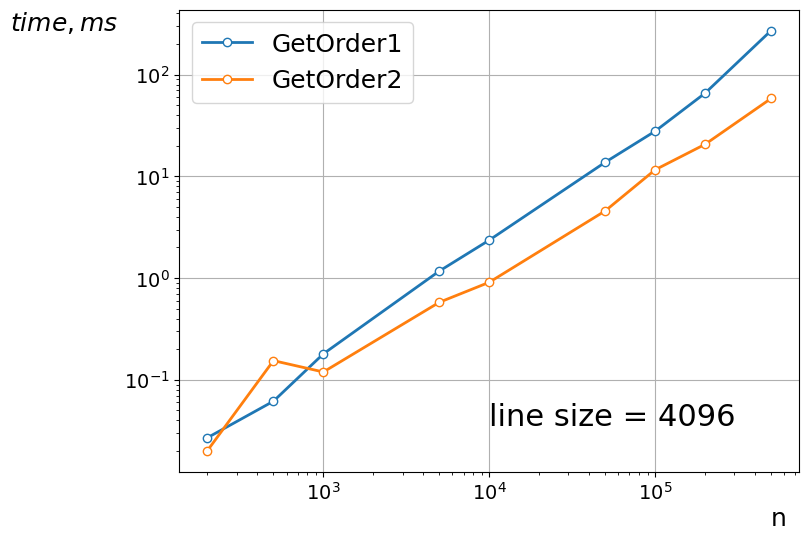

In [4]:
line_size = 4096

slice = mean[mean["line_size"] == line_size]

ax = slice.plot(x="n", y=methods, logx=True, logy=True, style="-o",
                figsize=(8, 6), grid=True, legend=True, markerfacecolor="white")
ax.set_ylabel(r"$time, ms$", position=(None, 1.0),
              rotation=0, verticalalignment="top", horizontalalignment="right")
ax.set_xlabel(r"n", position=(0.98, None), labelpad=20,
              verticalalignment="bottom", horizontalalignment="right")
ax.text(0.5, 0.1, f"line size = {line_size}",
        fontsize=22, transform=ax.transAxes)

ax.figure.savefig("cache_impact_by_n", bbox_inches="tight")

### Сечение: `n = const`

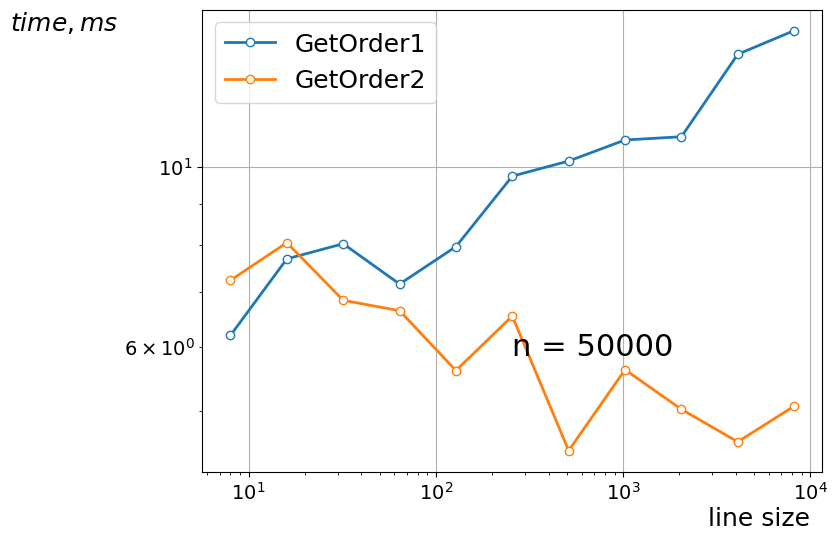

In [18]:
n = 500_000

slice = mean[mean["n"] == n]

ax = slice.plot(x="line_size", y=methods, logx=True, logy=True, style="-o",
                figsize=(8, 6), grid=True, legend=True, markerfacecolor="white")
ax.set_ylabel(r"$time, ms$", position=(None, 1.0),
              rotation=0, verticalalignment="top", horizontalalignment="right")
ax.set_xlabel(r"line size", position=(0.98, None), labelpad=20,
              verticalalignment="bottom", horizontalalignment="right")
ax.text(0.5, 0.25, f"n = {n}",
        fontsize=22, transform=ax.transAxes)

ax.figure.savefig("cache_impact_by_line_size", bbox_inches="tight")

### Поверхности в 3D

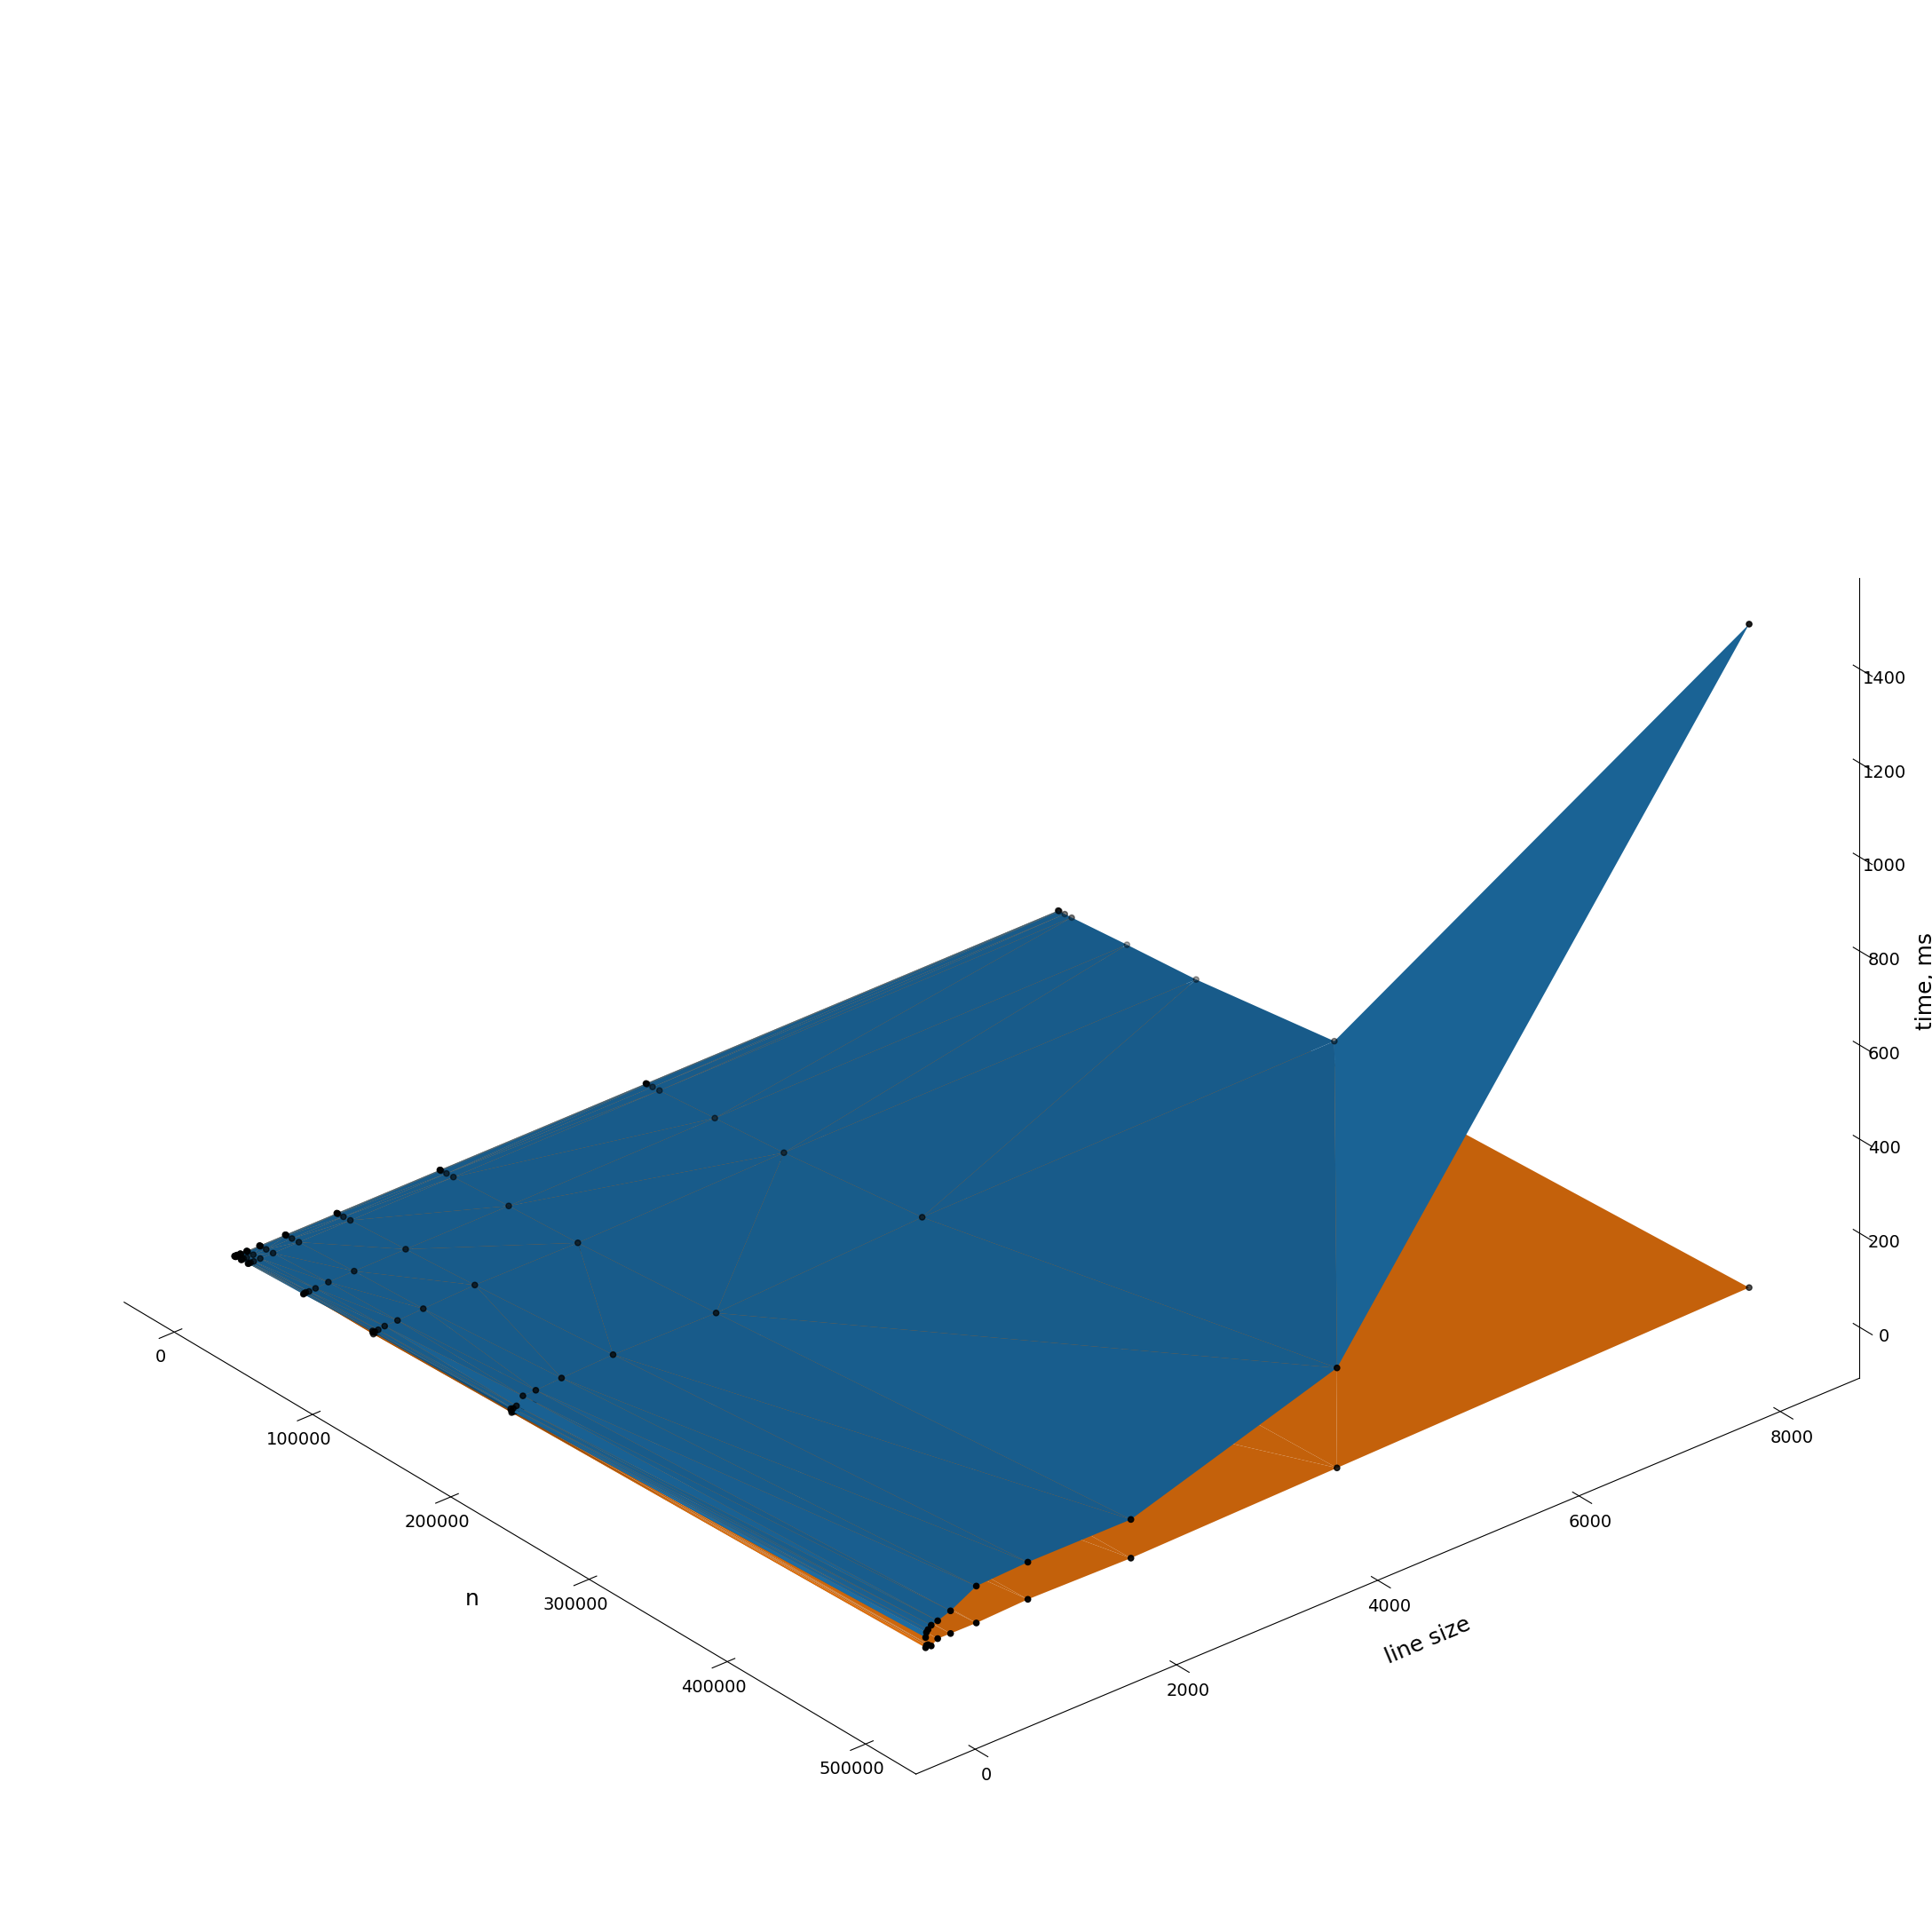

In [20]:
X, Y = mean["n"], mean["line_size"]
ax = plt.figure(figsize=(28, 28)).add_subplot(projection="3d")
ax.set_proj_type('ortho')
for func in methods:
    ax.plot_trisurf(X, Y, mean[func], linewidth=0, antialiased=True)
    ax.scatter(X, Y, mean[func], linewidth=1, c='k')

ax.set_xlabel("n", labelpad=20)
ax.set_ylabel("line size", labelpad=20)
ax.set_zlabel("time, ms", labelpad=10)

ax.grid(False)
for axis in (ax.xaxis, ax.yaxis, ax.zaxis):
    axis.pane.set_visible(False)

ax.view_init(elev=30, azim=-40)

ax.figure.savefig("cache_impact", bbox_inches="tight")